# CMIP6Figures.ipynb

Plot mean climate distributions and signals from multiple CMIP6 downscaled datasets which downcale CanESM5 and NorESM2-MM.

In [4]:

import xarray as xr
from analysisFuncs import plot_map, getRegion, regions, applyFunc
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import xesmf as xe
import os
import pandas as pd
from glob import glob
import seaborn as sns
from scipy.stats import gaussian_kde
mask = xr.open_dataset('conus_gmet_mask.nc')['mask'].sel(lat=slice(25.,50.),lon=slice(-125.,-67.))


## Save GMET and Livneh data for all cities in historical period

In [ ]:
p1 = ('1970','2010')
all_gcms = []
var_dict = {'pr':'pcp'}
var = 'tasmax'

files = glob('/glade/campaign/ral/hap/anewman/conus_v1p2/eighth/v2_landmask/conus_daily_eighth_*1231_001.nc4')
hist_ds = xr.open_mfdataset(np.sort(files),concat_dim='time',combine='nested').sel(time=slice(p1[0],p1[1]))
hist_ds['time'] = hist_ds['time'].values.astype('datetime64[ns]')

# Save data for list of cities
for loc in ('SEAT','DENV','MIAM','YUMA','FTLB','NYNY','CHIC'):
    ds = getRegion(hist_ds,regions[loc])
    if var=='tasmin':
        ds[var] = ds.t_mean - 0.5*ds.t_range.values
    elif var=='tasmax':
        ds[var] = ds.t_mean + 0.5*ds.t_range.values
    else:
        ds = ds.rename({var_dict[var]:var})
    ds['city'] = loc
    all_gcms.append(ds)       
        
final_ds = xr.concat(all_gcms,dim='gcm').set_coords('city')[var]
print(final_ds)

outfile = 'stat_files/GMET_CMIP6_%s_1970_2010.nc'%(var)
if os.path.exists(outfile):
    os.remove(outfile)

final_ds.to_netcdf(outfile)

In [57]:

p1 = ('1970','2010')
all_gcms = []
var_dict = {'pr':'PRCP',
           'tasmin':'Tmin',
           'tasmax':'Tmax'}
var = 'tasmax'

if var == 'pr':
    files = glob('/glade/campaign/ral/hap/common/Livneh_met_updated/precip/livneh_unsplit_precip.2021-05-02.*.nc')
    hist_ds = xr.open_mfdataset(np.sort(files)[50:],concat_dim='Time',combine='nested').sel(time=slice('1970','2010')).isel(Time=0)
else:
    files = glob('/glade/campaign/ral/hap/common/Livneh_met_updated/temp_and_wind/livneh_lusu_2020_temp_and_wind.2021-05-02.*.nc')
    hist_ds = xr.open_mfdataset(np.sort(files)[55:-5]).sel(time=slice('1970','2010'))

hist_ds = hist_ds.rename({var_dict[var]:var})[var] # ,'Time':'time'
hist_ds['time'] = hist_ds['time'].values.astype('datetime64[ns]')


# Save data for list of cities
for loc in ('SEAT','DENV','MIAM','YUMA','FTLB','NYNY','CHIC'):
    ds = getRegion(hist_ds,regions[loc])        
    ds['city'] = loc
    all_gcms.append(ds)       
        
final_ds = xr.concat(all_gcms,dim='gcm')
print(final_ds)

outfile = 'stat_files/LIVNEH_CMIP6_%s_1970_2010.nc'%(var)
if os.path.exists(outfile):
    os.remove(outfile)

final_ds.to_netcdf(outfile)

/glade/work/shartke/conda-envs/samEnv/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'Tmax' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/shartke/conda-envs/samEnv/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'Tmin' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/shartke/conda-envs/samEnv/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'Wind' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/shartke/conda-envs/samEnv/lib/python3.7/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'Tmax' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/glade/work/shartke/conda-envs/samEnv/lib/python3.7/

<xarray.DataArray 'tasmax' (gcm: 7, time: 14975)>
dask.array<concatenate, shape=(7, 14975), dtype=float32, chunksize=(1, 366), chunktype=numpy.ndarray>
Coordinates:
    lat      (gcm) float64 47.59 39.72 25.78 32.72 35.16 40.72 41.91
    lon      (gcm) float64 -122.3 -105.0 -80.22 -114.7 -78.97 -74.03 -87.66
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 2010-12-31
    city     (gcm) <U4 'SEAT' 'DENV' 'MIAM' 'YUMA' 'FTLB' 'NYNY' 'CHIC'
Dimensions without coordinates: gcm
Attributes:
    units:      degC
    long_name:  Maximum daily air temperature


### Plot PDFs of downscaled dataset precipition, tasmin, and tasmax, along with original GCM and obs datasets, at several cities

/glade/work/shartke/conda-envs/samEnv/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/glade/work/shartke/conda-envs/samEnv/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/glade/work/shartke/conda-envs/samEnv/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/glade/work/shartke/conda-envs/samEnv/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/glade/work/shartke/conda-envs/samEnv/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: elementwise compariso

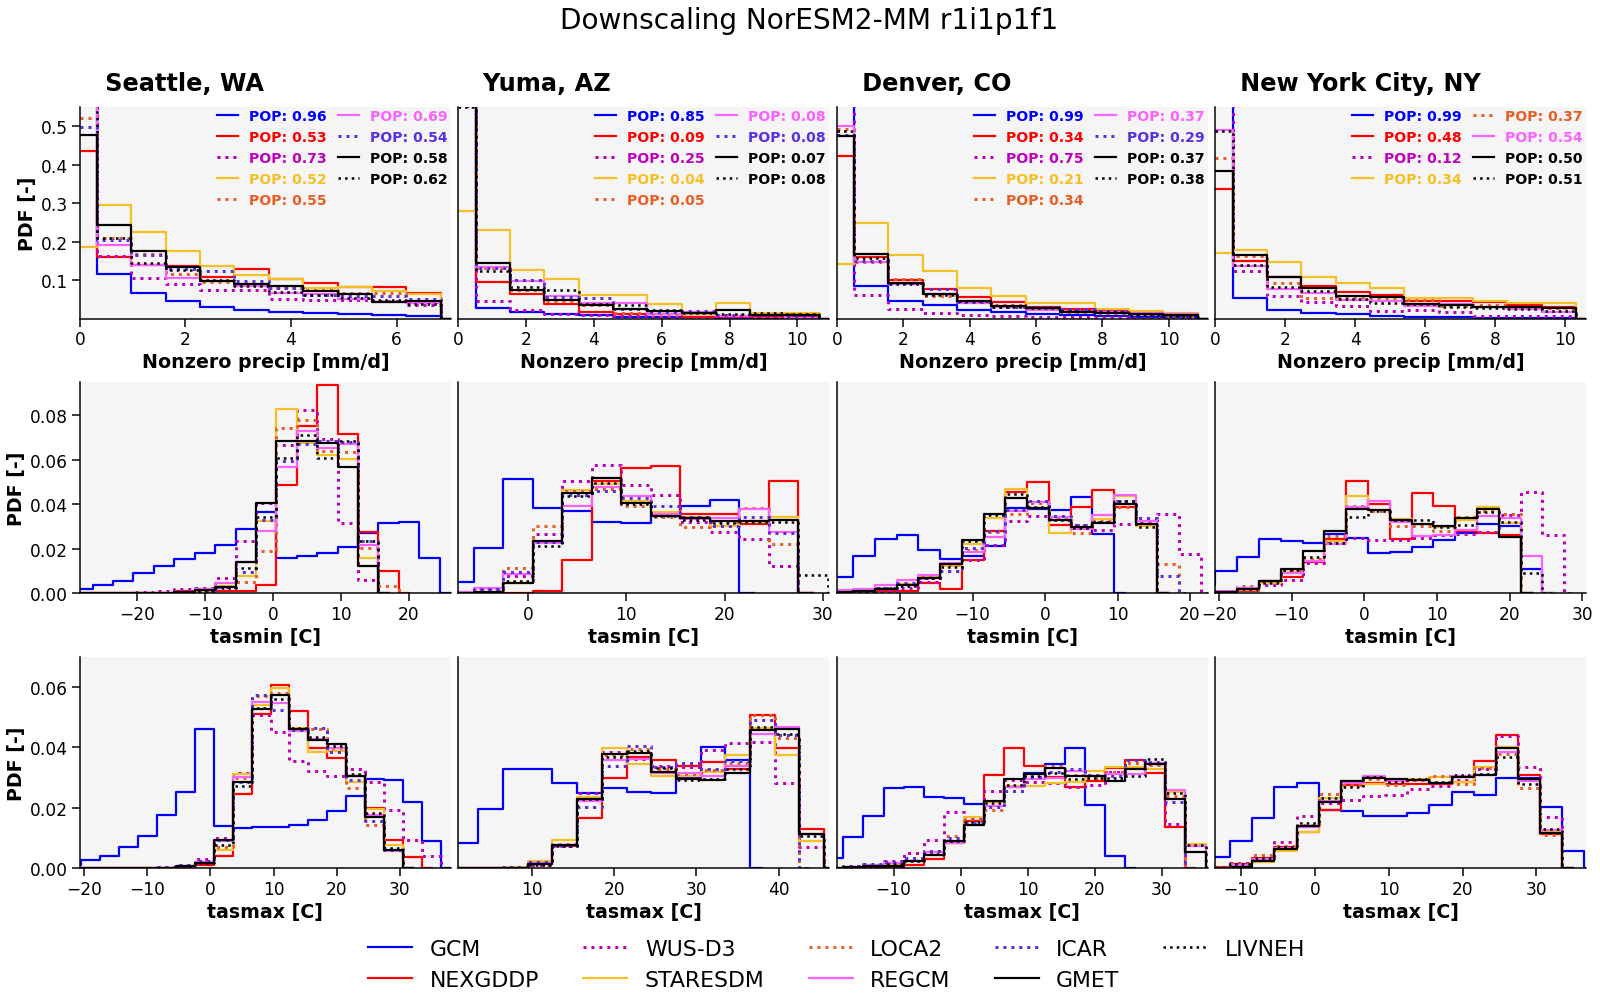

In [20]:

var = 'pr'
gcm = 'NorESM2-MM'
#gcm = 'CanESM5'
method = 'hist' # Select method for distribution: CSGD, hist, or KDE

city_names = {'SEAT':'Seattle, WA',
             'YUMA':'Yuma, AZ',
             'DENV':'Denver, CO',
             'NYNY':'New York City, NY'}

fig = plt.figure(figsize=(27,14))

colors = ('b','r','m','#F5C025','#E85E23','#FA61FF','#5930E0')
i = 1

for var in ('pr','tasmin','tasmax'):

    if gcm == 'CanESM5': dlist = list(('GCM','NEXGDDP','DEEPSD','STARESDM','LOCA2','GARDLENS','ICAR','GMET','LIVNEH'))
    else: dlist = list(('GCM','NEXGDDP','WUS-D3','STARESDM','LOCA2','REGCM','ICAR','GMET','LIVNEH'))
        
    for city in ('SEAT','YUMA','DENV','NYNY'):
        if city=='NYNY': dlist.remove('ICAR')
        
        ax1 = fig.add_subplot(3,4,i)
        colorlist = []
        j=0
        for d in dlist:
            if (j==2) or (j==4) or (j==6):
                lw=3.;linestyle='dotted'
            else:
                lw=2.2;linestyle='solid'
            ds = xr.open_dataset('stat_files/%s_CMIP6_%s_1970_2010.nc'%(d,var))
    
            if (d not in ('GMET','LIVNEH')) & (gcm not in ds.gcm.values):
                print(d,' does not have %s data.'%gcm)
            else:
                if d in ('GMET','LIVNEH'):
                    ds = ds.sel(time=slice('1980','2010')).where(ds.city==city,drop=True)
                else:
                    ds = ds.sel(time=slice('1980','2010')).where((ds.city==city)&(ds.gcm==gcm),drop=True)
                
                var_values = ds[var].dropna('time').values[0]
                    
                if np.mean(var_values)>200.: var_values-=273.15
                
                if var=='pr':
                    if d=='GCM':
                        if method=='hist': pcp = np.arange(0.,ds[var].quantile(.99),ds[var].quantile(.99)/12.)
                        else: pcp = np.arange(-2.,ds[var].quantile(.9998),.03)
                        limpr = ds[var].quantile(.99)
                    
                    
                    if d=='DEEPSD':
                        print(city,np.min(var_values))
                        pp = float(len(var_values[var_values>np.min(var_values)]))/len(var_values) # probability of nonzero precipitation
                        var_values = var_values[var_values!=np.min(var_values)]
                    else:
                        pp = float(len(var_values[var_values>0.0]))/len(var_values) # probability of nonzero precipitation
                        var_values = var_values[var_values>0.0]
                else:
                    if method=='hist': pcp = np.arange(-40.,np.quantile(var_values,.999),3.)
                    else: pcp = np.arange(np.quantile(var_values,.0001),np.quantile(var_values,.9999),.2)
                
                if method=='CSGD':
                    csgd = fitcsgd_clim(var_values).x
                    pdf = dcsgd(pcp,csgd)

                elif method=='KGE':
                    kde = gaussian_kde(var_values,bw_method=0.7)  # [var_values>0.0]
                    pdf = kde(pcp)
                
                if d=='GMET':
                    if (method=='KGE')or(method=='CSGD'):
                        line1, = ax1.plot(pcp,pdf,label=d+' POP: %.02f'%pp,linewidth=1.8,c='k')
                    elif method=='hist':
                        counts, bin_edges, _ = ax1.hist(var_values, bins=pcp, density=True,
                                                        facecolor='none', edgecolor='none')
                        line1, = ax1.step(bin_edges, np.append(counts,0.), where='mid', lw=2.2,color='k',label='POP: %.02f'%pp if var=='pr' else d)
                elif d=='LIVNEH':
                    if (method=='KGE')or(method=='CSGD'):
                        line1, = ax1.plot(pcp,pdf,label='POP: %.02f'%pp if var=='pr' else d,linewidth = 2.5,c='k',linestyle='dashed')
                    elif method=='hist':
                        counts, bin_edges, _ = ax1.hist(var_values, bins=pcp, density=True,facecolor='none', edgecolor='none')
                        line1, = ax1.step(bin_edges, np.append(counts,0.), where='mid', color='k',linestyle='dotted',
                                          label='POP: %.02f'%pp if var=='pr' else d,lw=2.5)
                else:
                    if (method=='KGE')or(method=='CSGD'):
                        line1, = ax1.plot(pcp,pdf,label='POP: %.02f'%pp if var=='pr' else d)
                    elif method=='hist':
                        counts, bin_edges, _ = ax1.hist(var_values, bins=pcp, density=True,facecolor='none', edgecolor='none')
                        line1, = ax1.step(bin_edges, np.append(counts,0.), where='mid',label='POP: %.02f'%pp if var=='pr' else d,
                                         c = colors[j],lw=lw,linestyle=linestyle)
                
                colorlist.append(line1.get_color())

                if j==0:
                    lim0 = np.quantile(var_values,0.005)
                    lim1 = np.quantile(var_values,0.995)
                else:
                    if np.quantile(var_values,0.005)<lim0:
                        lim0 = np.quantile(var_values,0.005)
                    if np.quantile(var_values,0.995)>lim1:
                        lim1 = np.quantile(var_values,0.995)
                j+=1
        
        
        if var=='pr':
            ax1.set_title('   '+city_names[city],y=1.05,loc='left',fontsize=24)
            legend = ax1.legend(fontsize=15,ncol=2, columnspacing=0.8,handlelength=1.5,
                               bbox_to_anchor=(0.68, 1.05),prop={'weight': 'bold', 'size': 14},
                               loc='upper center')
            for j in range(len(legend.get_texts())):
                legend.get_texts()[j].set_color(colorlist[j])
        elif i==11:
            legend = ax1.legend(fontsize=22,ncol=5,loc=8,bbox_to_anchor=(0.,-0.67))
        
        if var=='pr':
            #ax1.set_yscale('log')
            ax1.set_ylim((.001,.55))
            ax1.set_xlim((0.,limpr*0.9))
        else:
            if var=='tasmin': ax1.set_ylim((0.,.095))
            elif var=='tasmax': ax1.set_ylim((0.,.07))
            ax1.set_xlim((lim0,lim1))
        if i%4==1:
            ax1.set_ylabel('PDF [-]',fontsize=19)
            ax1.tick_params(axis='y', labelsize=17)
        else: ax1.set_yticks([])
        ax1.tick_params(axis='x', labelsize=17)
        if var=='pr': ax1.set_xlabel('Nonzero precip [mm/d]',fontsize=19)
        else: ax1.set_xlabel('%s [C]'%var,fontsize=19)
        ax1.spines[['right', 'top']].set_visible(False)
        i+=1


fig.subplots_adjust(wspace=0.02,hspace=0.3)
fig.suptitle('Downscaling %s r1i1p1f1'%gcm,fontsize=28)
plt.savefig('figures/Figure4_historicalPDFs_%s_nonzeropcp.jpg'%gcm,dpi=1200,bbox_inches='tight')
plt.show()


## Open and plot signal for mean t_mean and pcp for CanESM5 r1i1p1f1 & all downscaled datasets which downscale that member for SSP370 & SSP585

In [2]:

## Functions to load in datasets

cmip = 'CMIP6'
var = 'pr'

def retrieveDSstats(scen,var):
    if scen=='ssp370':datasets = ('DEEPSD','LOCA2','NEXGDDP','GARDLENS','ICAR') #,'UCLAWRF'
    elif scen=='ssp585':datasets = ('DEEPSD','LOCA2','NEXGDDP','STARESDM','ICAR')
    
    files = []
    
    for dataset in datasets:
    
        ds = xr.open_dataset('stat_files/%s_%s_%s_signal_%s.nc'%(dataset,cmip,scen.lower(),var))
        ds['dset'] = dataset
        # print(ds)
        try: ds = ds.rename({'latitude':'lat','longitude':'lon'})
        except: i=0
        try: ds = ds.drop(('std_pr','sum_pr'))
        except: i=0
        if var=='tasmin': ds = ds[['mean_tasmin','q95_tasmin','dset']]
        if dataset=='REGCM':
            for v in ('mean','mean_jja','sum','q95','std'):
                ds = ds.rename({v+'_prcp':v+'_pr'})
            
        files.append(ds.sortby('lat').sel(lat=slice(25.,50.),lon=slice(-125.,-67.)).set_coords(('gcm','dset')))
    
    ds = xr.concat(files,dim='dset',coords='minimal')
    ds = ds.sel(gcm=['CanESM5','EC-Earth3','MIROC6','MRI-ESM2-0','NorESM2-MM'])
    # print(ds)
    return(ds)

extent = (25.,50.,-125.,-67.)

# Open CanESM5 r1i1p1f1 & calculate signal for ssp370
def getGCMsignal(gcm,scen,var):

    if var=='pr':
        dir_ = '/glade/derecho/scratch/flehner/cmip6-ng_annual/%s/ann/g025/'%var
        ds_hist = xr.open_dataset(dir_ + '%s_ann_%s_historical_r1i1p1f1_g025.nc'%(var,gcm))
        if var=='tas': ds_hist = ds_hist.drop('height')
        ds_hist['lon'] = ds_hist['lon']-180.
        ds_hist = getRegion(ds_hist,extent).sel(time=slice('1970','2010')).mean('time')[var]
        
        ds_ssp370 = xr.open_dataset(dir_ + '%s_ann_%s_%s_r1i1p1f1_g025.nc'%(var,gcm,scen))
        if var=='tas': ds_ssp370 = ds_ssp370.drop('height')
        ds_ssp370['lon'] = ds_ssp370['lon']-180.
        ds_ssp370 = getRegion(ds_ssp370,extent).sel(time=slice('2070','2100')).mean('time')[var]
        
        gcm_signal = ds_ssp370 - ds_hist.values

    else:
        gcm_signal = xr.open_dataset('stat_files/GCM_CMIP6_%s_signal_tasmax.nc'%scen).sel(gcm=gcm)['mean_%s'%var]
        
    return(gcm_signal)

# Function to map S/N ratio values to bins in colormap to make boundary around 1 more visible
def map_values(ds):
    
    bins = np.array([0., 0.2, 0.4, 0.6, 0.8, 1., 2., 3., 4., 5., 6.]) # Define the bins and the corresponding new values
    new_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    binned_data = np.digitize(ds.values, bins) # Digitize the data to map it to the bin indices
    new_ds = ds.copy()
    new_ds.values = binned_data
    
    return(new_ds)



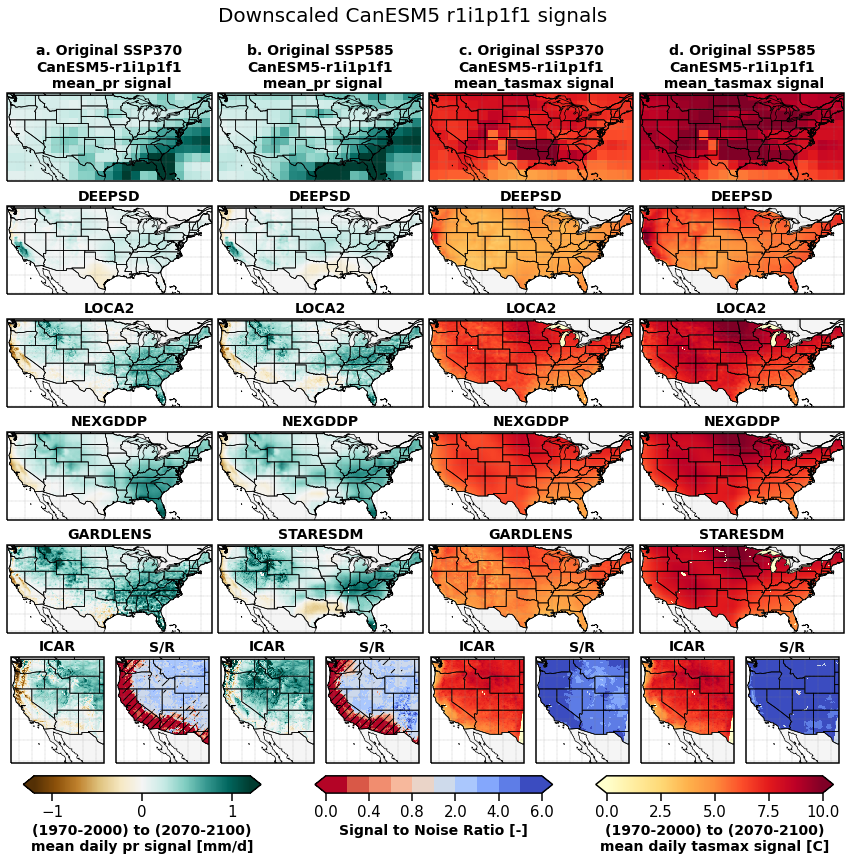

In [5]:

fig = plt.figure(figsize=(15,12))
#fig, axes = plt.subplots(4, 5, figsize=(16, 8), subplot_kw={'projection': ccrs.PlateCarree()},
                        # constrained_layout=True)
#gs = gridspec.GridSpec(6, 4)

proj = ccrs.PlateCarree()

ylim = (24.6,49.5); xlim = (-125.,-67.)

g = 'CanESM5'
func = 'mean'
letters = ('a','b','c','d')
axes = []

i=0
for var in ('pr','tasmax'):

    stat = '%s_%s'%(func,var)
    if var=='pr': vmin=-1.2;vmax=1.2;cmap=mpl.cm.BrBG
    elif var=='tasmax': vmin=0.;vmax=10.;cmap='YlOrRd'
        
    for scen in ('ssp370','ssp585'):
    
        #ax1 = fig.add_subplot(gs[0,i],projection=proj)
        ax1 = fig.add_subplot(6,4,i+1,projection=proj)
        gcm_signal = getGCMsignal(g,scen,var)
        if var=='pr': gcm_signal = gcm_signal*86400
        plot_map(gcm_signal,ax=ax1,cmap=cmap,ylim=ylim,xlim=xlim,vmin=vmin,vmax=vmax,
                     colorbar=False,left=False,bottom=False)
        ax1.set_title('%s. Original %s\nCanESM5-r1i1p1f1\n %s signal'%(letters[i],scen.upper(),stat),fontsize=14)
        #ax1.set_title('daily %s\n%s signal\nOriginal CanESM5-r1i1p1f1\n%s %s signal'%(var,scen,scen,stat),fontsize=14,fontweight='bold')
        ds = retrieveDSstats(scen,var)

        j=4
        for d in ds.dset.values:

            if d=='ICAR':
                ax1 = fig.add_subplot(6,8,40+2*i+1,projection=proj)
                ax1.set_extent([xlim[0], -100., ylim[0], ylim[1]], crs=ccrs.PlateCarree())
                plot_map(ds.sel(gcm=g,dset=d)[stat].where(mask.values),ax=ax1,cmap=cmap,ylim=ylim,xlim=(-125.,-103.),vmin=vmin,vmax=vmax,
                         colorbar=False,left=False,bottom=False)
                ax1.set_title(d,fontsize=14)
                axes.append(ax1)
                
                ax1 = fig.add_subplot(6,8,40+2*i+2,projection=proj)
                ax1.set_extent([xlim[0], -100., ylim[0], ylim[1]], crs=ccrs.PlateCarree())
                snr = ds[stat].sel(gcm=g).mean('dset')/ds[stat].sel(gcm=g).std('dset')
                snr = map_values(snr)
                plot_map(snr.where(mask.values),ax=ax1,cmap='coolwarm_r',ylim=ylim,xlim=(-125.,-103.),vmin=1.,vmax=10.,
                         colorbar=False,left=False,bottom=False)
                gcm_max = ds[stat].sel(gcm=g).max('dset'); gcm_min = ds[stat].sel(gcm=g).min('dset')
                mask0 = (gcm_max.where(mask.values) > 0) & (gcm_min.where(mask.values) < 0)
                ax1.contourf(snr.lon, snr.lat, mask0, levels=[0.5, 1], colors='none', hatches=['///'], transform=ccrs.PlateCarree()) # Add hatching where the condition is True
                ax1.set_title('S/R',fontsize=14)
                axes.append(ax1)
                
            else:
                ax1 = fig.add_subplot(6,4,i+j+1,projection=proj)
                ax1.set_extent([xlim[0], xlim[1], ylim[0], ylim[1]], crs=ccrs.PlateCarree())
                plot_map(ds.sel(gcm=g,dset=d)[stat].where(mask.values),ax=ax1,cmap=cmap,ylim=ylim,xlim=xlim,vmin=vmin,vmax=vmax,
                         colorbar=False,left=False,bottom=False)
            
                ax1.set_title(d,fontsize=14)
            #ax1.set_aspect(aspect='auto')
            
            j+=4
        i+=1

    if var=='pr': ax2 = fig.add_axes([0.14, 0.07, 0.22, 0.02]);unit='mm/d'
    else: ax2 = fig.add_axes([0.67, 0.07, 0.22, 0.02]); unit='C'
    cb = mpl.colorbar.ColorbarBase(ax2, orientation='horizontal', 
                                   cmap=cmap,
                                   norm=mpl.colors.Normalize(vmin,vmax),  # vmax and vmin
                                   extend='both',
                                   label='(1970-2000) to (2070-2100)\nmean daily %s signal [%s]'%(stat[5:],unit))
    cb.ax.tick_params(labelsize=15)


cmap = plt.get_cmap('coolwarm_r')
bounds = np.array([0, 0.2, 0.4, 0.6, 0.8, 1, 2, 3, 4, 5, 6])
norm = mcolors.BoundaryNorm(boundaries=bounds, ncolors=cmap.N, clip=False)
ax2 = fig.add_axes([0.41, 0.07, 0.22, 0.02]); unit='C'
cb = mpl.colorbar.ColorbarBase(ax2, orientation='horizontal', 
                               cmap=cmap, norm=norm,
                               extend='both', label='Signal to Noise Ratio [-]')
cb.ax.tick_params(labelsize=15)

plt.subplots_adjust(wspace=.03,hspace=0.28)

for ax in axes:  # This selects all subplots in the last row
    pos = ax.get_position()
    ax.set_position([pos.x0-.008, pos.y0 - 0.02, pos.width*1.2, pos.height * 1.2])  # Reduce height


fig.suptitle('Downscaled %s r1i1p1f1 signals'%g,fontsize=20)
plt.savefig('figures/Figure5_CMIP6_%s_signal_maps.jpg'%g,dpi=1200,bbox_inches='tight')
plt.show()
